<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    48.269230  46.632372  34.778764  ...  139.692001  139.691710  0.000291
      1.0    95.820803  70.443885  46.961367  ...  223.242158  223.220415  0.021743
      2.0    47.253725  83.802756  32.973787  ...  174.015715  174.034043 -0.018328
      3.0    86.036957  45.938341  67.621278  ...  209.600232  209.594173  0.006060
      4.0    41.071115  75.564230  32.232245  ...  158.873894  158.874530 -0.000636
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   98.282315  85.859063  25.376553  ...  219.538161  219.526273  0.011888
      56.0   47.803060  62.154261  49.297226  ...  169.275228  169.253221  0.022007
      57.0   56.276963  30.828961  94.722812  ...  191.819243  191.813120  0.006123
      58.0   93.089537  87.133481  45.025762  ...  235.223912  235.253668 -0.029756
      59.0   97.901688  80.289961  73.140081  ...  261.338266  261.330178  0.008088

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    48.269230  46.632372  34.778764  ...  139.692001  139.691710  0.000291
      1.0    95.820803  70.443885  46.961367  ...  223.242158  223.220415  0.021743
      2.0    47.253725  83.802756  32.973787  ...  174.015715  174.034043 -0.018328
      3.0    86.036957  45.938341  67.621278  ...  209.600232  209.594173  0.006060
      4.0    41.071115  75.564230  32.232245  ...  158.873894  158.874530 -0.000636
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   98.282315  85.859063  25.376553  ...  219.538161  219.526273  0.011888
      56.0   47.803060  62.154261  49.297226  ...  169.275228  169.253221  0.022007
      57.0   56.276963  30.828961  94.722812  ...  191.819243  191.813120  0.006123
      58.0   93.089537  87.133481  45.025762  ...  235.223912  235.253668 -0.029756
      59.0   97.901688  80.289961  73.140081  ...  261.338266  261.330178  0.008088

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    48.269230  46.632372  34.778764  ...  139.692001  139.691710  0.000291
      1.0    95.820803  70.443885  46.961367  ...  223.242158  223.220415  0.021743
      2.0    47.253725  83.802756  32.973787  ...  174.015715  174.034043 -0.018328
      3.0    86.036957  45.938341  67.621278  ...  209.600232  209.594173  0.006060
      4.0    41.071115  75.564230  32.232245  ...  158.873894  158.874530 -0.000636
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   98.282315  85.859063  25.376553  ...  219.538161  219.526273  0.011888
      56.0   47.803060  62.154261  49.297226  ...  169.275228  169.253221  0.022007
      57.0   56.276963  30.828961  94.722812  ...  191.819243  191.813120  0.006123
      58.0   93.089537  87.133481  45.025762  ...  235.223912  235.253668 -0.029756
      59.0   97.901688  80.289961  73.140081  ...  261.338266  261.330178  0.008088

[60000 rows x 7 columns]

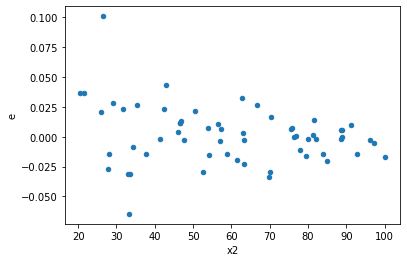

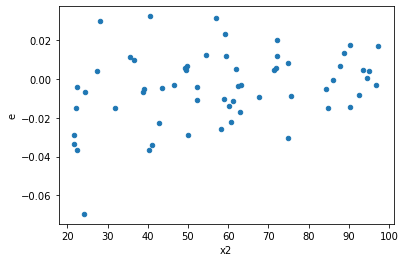

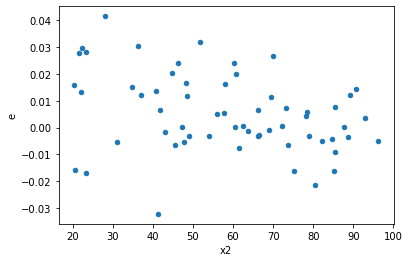

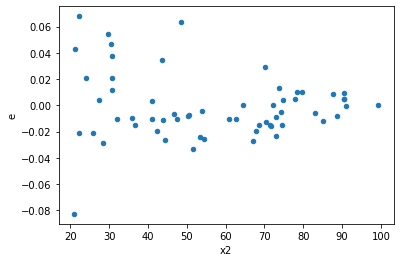

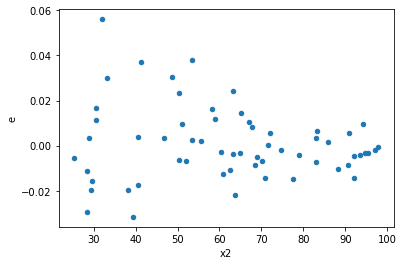

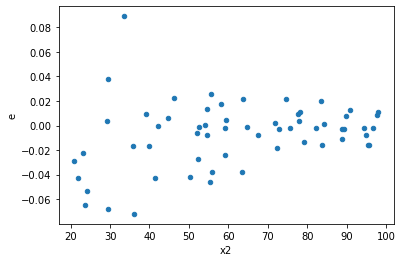

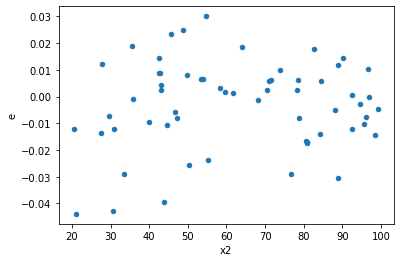

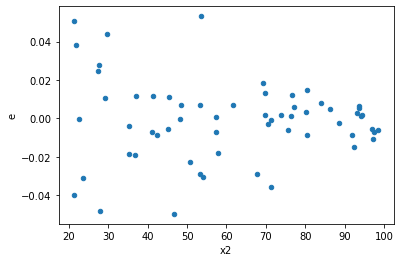

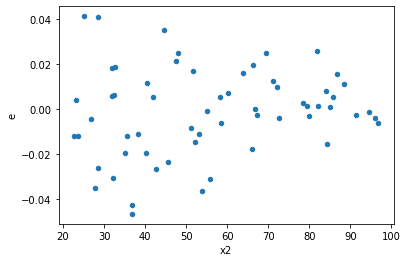

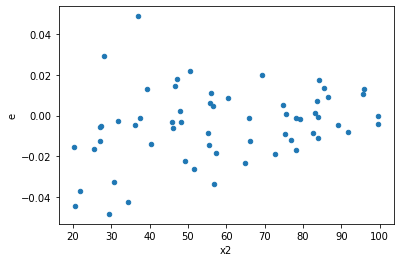

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.021267966136983178,0.0035382082796493247,0.0010127602922372942,0.00016848610855472974,0.16636326467986434,0.00012709342992142615,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.010037491861775901,0.0026368931826209405,0.0004779758029417096,0.0001255663420295686,0.26270439059209394,0.0034417949331165625,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,0.006070202322920219,0.0022613502373821535,0.00028905725347239136,0.00010768334463724541,0.3725329267598903,0.028295638618083423,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,0.020926149446898357,0.003029812678539535,0.0009964833069951598,0.00014427679421616835,0.14478596199591845,4.2114470429621524e-05,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.010623712742794687,0.0009051089264256081,0.0005058910829902232,4.31004250678861e-05,0.0851970444174029,4.444756233578047e-07,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.027705105324471575,0.0028382799600148918,0.0013192907297367416,0.00013515618857213771,0.1024460988967212,2.2809845491758834e-06,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.006984983775780863,0.0036399458734629095,0.00033261827503718397,0.00017333075587918617,0.5211101400240538,0.14341903967865932,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.014246797018785276,0.002372411756923174,0.0006784189056564417,0.00011297198842491304,0.16652246492983674,0.00012804471796220657,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,0.013768711834822535,0.002581714494332559,0.0006556529445153588,0.00012293878544440757,0.1875058847410205,0.00031766433607149566,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    895
Reject001=1 : Homoscedasticity      105
Name: Result_test, dtype: int64